## Objective- The company wants to understand what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not. The goal is to create or improve different retention strategies on targeted employees. Overall, the implementation of this model will allow management to create better decision-making actions.



## Importing libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
hr=pd.read_csv('/Users/arjun/Documents/HR_Analytics.csv') # simply give the path where file is stored

In [4]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
type(hr)

pandas.core.frame.DataFrame

### Sales column does not make any sense as it is basically a department column

In [26]:
# Renaming certain columns for better readability
hr = hr.rename(columns={'sales' : 'department'})

## Checking for missing values

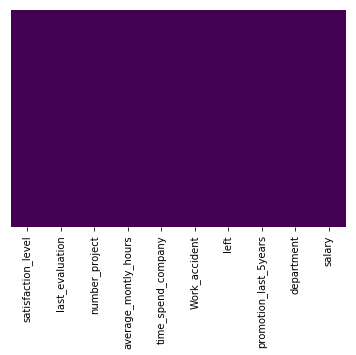

In [27]:
sns.heatmap(hr.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### There are no missing values in the dataset as I could vizualise with a heatmap. If there were missing values there would be some yellow points in the dataset

## 76 % of the employees did not leave the company where as 23 % left 

In [28]:
hr['left'].value_counts()/len(hr['left'])

0    0.761917
1    0.238083
Name: left, dtype: float64

## Number of employees based on number of projects

In [29]:
hr['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

## Knowing more about the dataset

In [30]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Statistically describing the dataset

In [31]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Finding correlation between the features

In [32]:
corr=hr.corr()

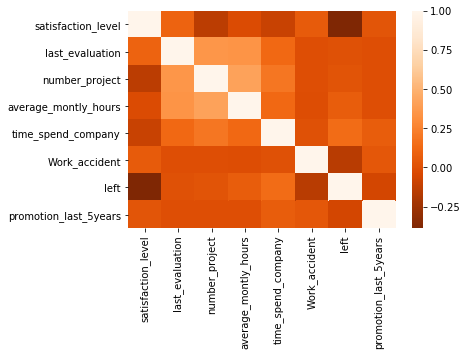

In [33]:
sns.heatmap(corr,xticklabels=True,yticklabels=True,cmap='Oranges_r')

In [34]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


## Moderate Positively Correlated Features:
### Number of projects vs last evaluation: 0.349333
### Number of projects vs averageMonthlyHours: 0.417211
### Average monthly hours vs last evaluation: 0.339742

## Moderate Negatively Correlated Feature:
### Satisfaction level vs left : -0.388375

In [35]:
summary_of_left=hr.groupby('left').mean()
summary_of_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### By grouping the 'left' column and describing the data, one can clearly see that employees who had less satisfaction left the company

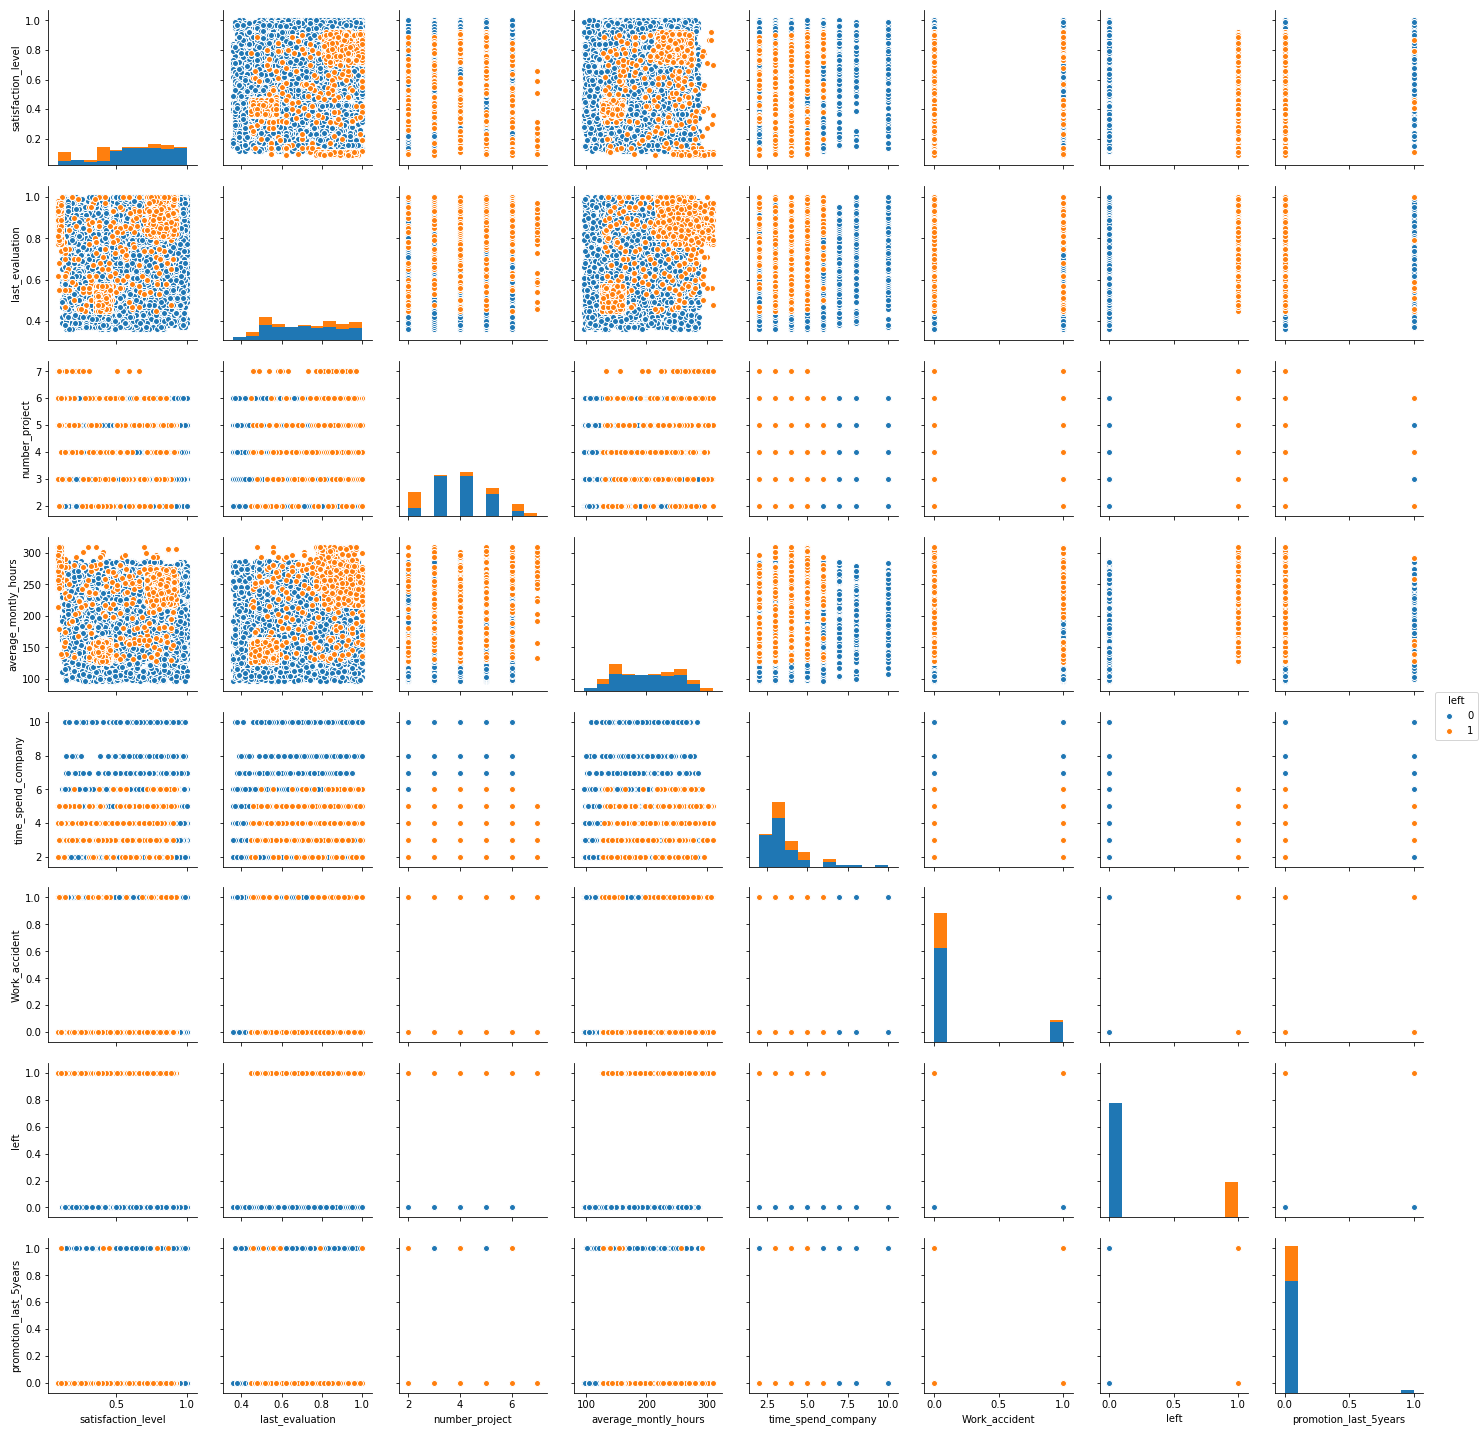

In [36]:
sns.pairplot(hr,hue='left')

## Employee retention vs salary range

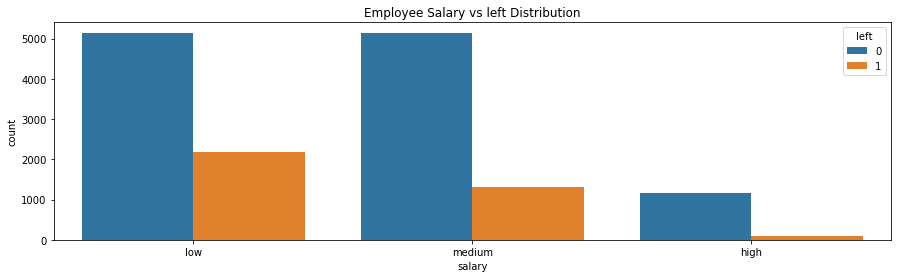

In [37]:
#employee retention vs salary range
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(x="salary", hue='left', data=hr).set_title('Employee Salary vs left Distribution')

## Employee retention based on departments

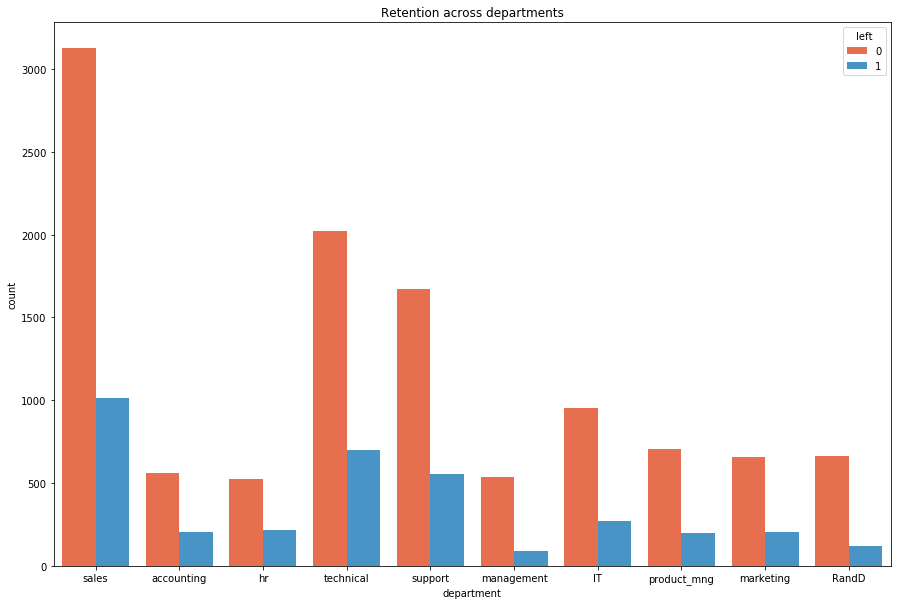

In [40]:
#employee retention based on departments
flatui = ["#FF6037", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='department', hue='left', data=hr,palette=flatui).set_title('Retention across departments');

## Finding data distribution across various features

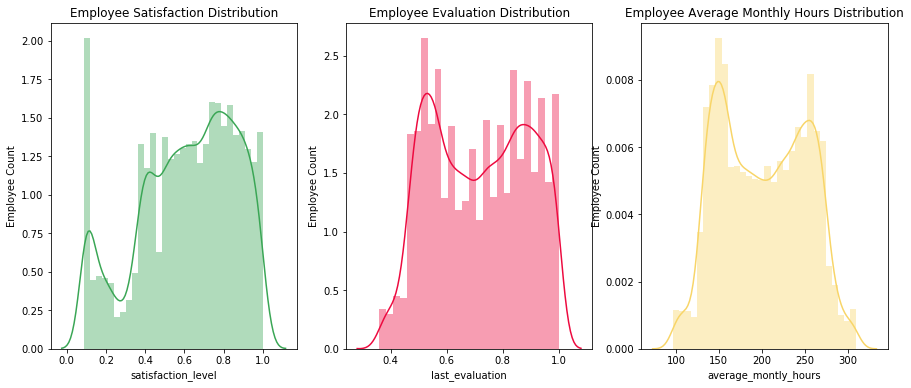

In [41]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(hr.satisfaction_level, color="#3AA655", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(hr.last_evaluation, color="#ED0A3F", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(hr.average_montly_hours, color="#F8D568", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

## Number of projects vs satisfaction level

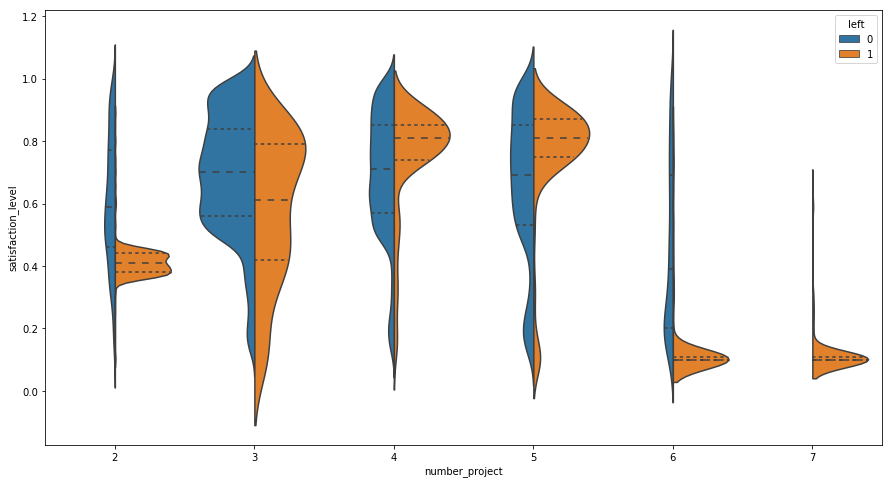

In [42]:
f, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(x="number_project", y="satisfaction_level", hue="left", data=hr, split=True,
               inner="quart")

## Through this violin plot one can see that the organization has employees concentrated with 3 projects. One can also check the distribution of employees who left and did not leave by looking at the bulges on the plot. 

## Time Spent in the company vs satisfaction level

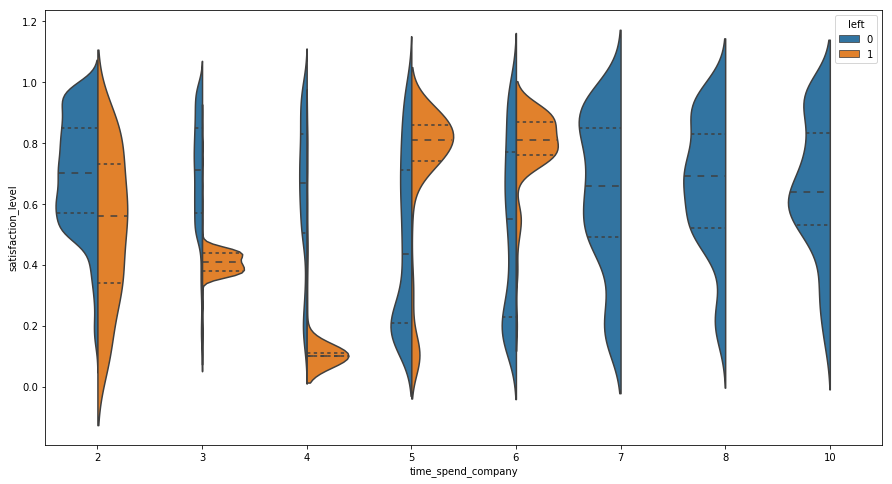

In [43]:
f, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(x="time_spend_company", y="satisfaction_level", hue="left", data=hr, split=True,
               inner="quart")

## Density of employees based on Evaluation

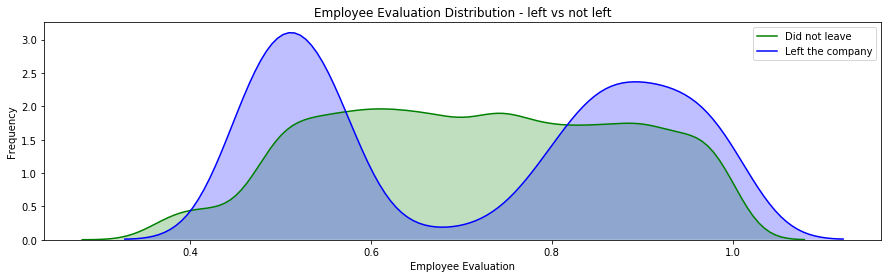

In [44]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(hr.loc[(hr['left'] == 0),'last_evaluation'] , color='g',shade=True,label='Did not leave')
ax=sns.kdeplot(hr.loc[(hr['left'] == 1),'last_evaluation'] , color='b',shade=True, label='Left the company')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - left vs not left')

## Employees who are evaluated less (0.4-0.6) and evaluated high (0.8-1.0) leave the company more whereas employees who donot leave the company are the ones who are evaluated medium (0.6-0.8)

## Density plot based on Satisfaction

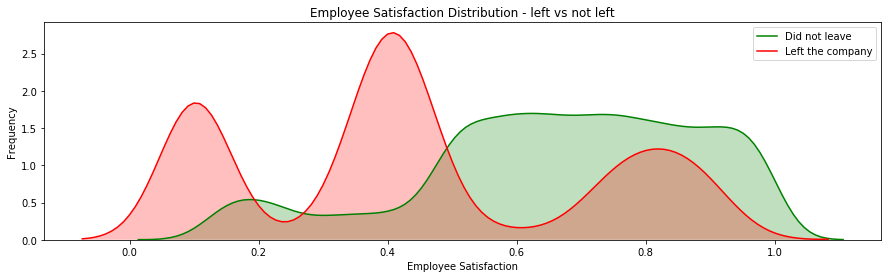

In [45]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(hr.loc[(hr['left'] == 0),'satisfaction_level'] , color='g',shade=True,label='Did not leave')
ax=sns.kdeplot(hr.loc[(hr['left'] == 1),'satisfaction_level'] , color='r',shade=True, label='Left the company')
ax.set(xlabel='Employee Satisfaction', ylabel='Frequency')
plt.title('Employee Satisfaction Distribution - left vs not left')

## Density plot based on Monthly Hours

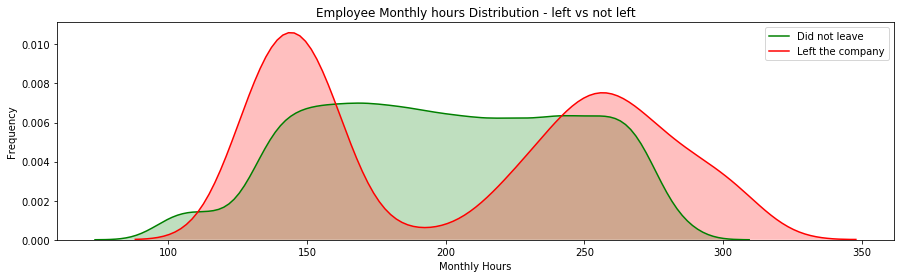

In [46]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(hr.loc[(hr['left'] == 0),'average_montly_hours'] , color='g',shade=True,label='Did not leave')
ax=sns.kdeplot(hr.loc[(hr['left'] == 1),'average_montly_hours'] , color='r',shade=True, label='Left the company')
ax.set(xlabel='Monthly Hours', ylabel='Frequency')
plt.title('Employee Monthly hours Distribution - left vs not left')

## This shows that employees who were underworked (130-160 hours) and employees who were overworked (230-290 hours) leave the company  whereas employees who are working optimum hours retain.

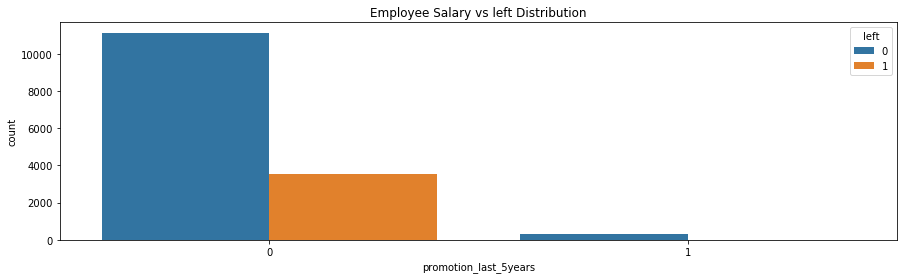

In [47]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(x="promotion_last_5years", hue='left', data=hr).set_title('Employee Salary vs left Distribution')

## Number of projects vs last evaluation

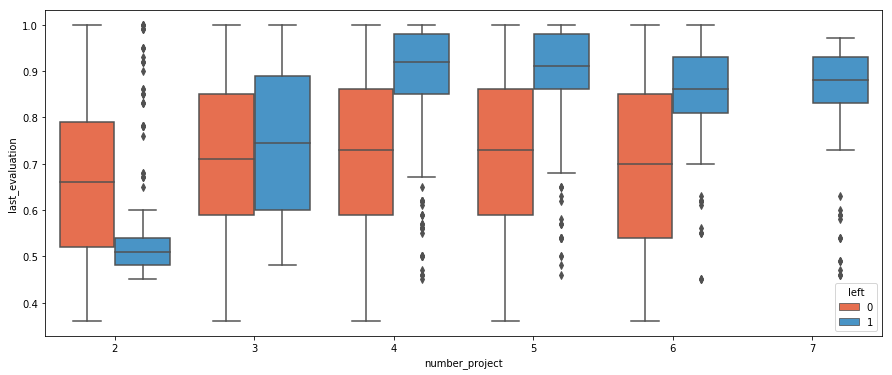

In [48]:
f, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="number_project", y="last_evaluation", hue="left", data=hr,palette=flatui)

## Time spent in the company vs last evaluation

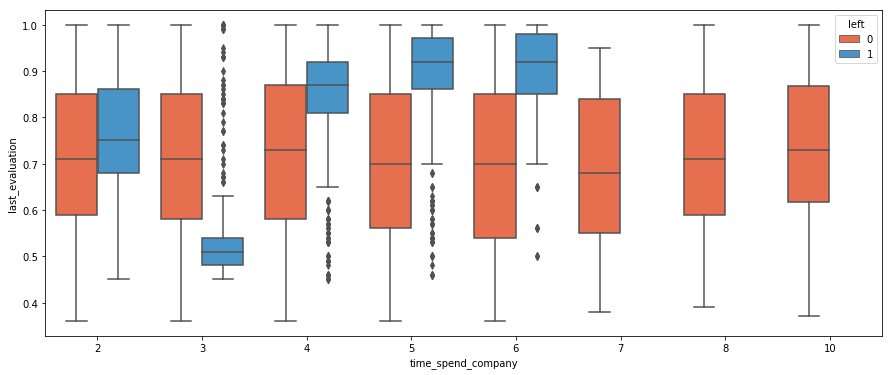

In [49]:
f, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="time_spend_company", y="last_evaluation", hue="left", data=hr,palette=flatui)

## Employee satisfaction vs last evaluation

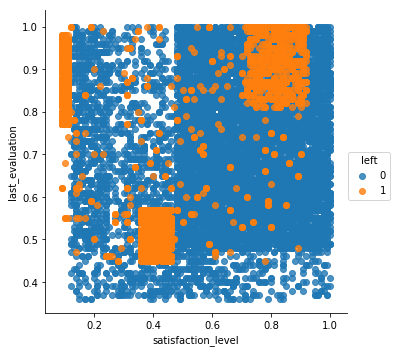

In [50]:
# satisfaction and evaluation
sns.lmplot(x='satisfaction_level', y='last_evaluation', data=hr,fit_reg=False,hue='left')

## One can see that employees who had high evaluation but low satisfaction tend to leave the company. 
## Employees with low satisfaction level and low evaluation also leave the company
## Employees with high satisfaction and high evaluation leave the company.

# Now let's start predicting !!

## Finding highly important features

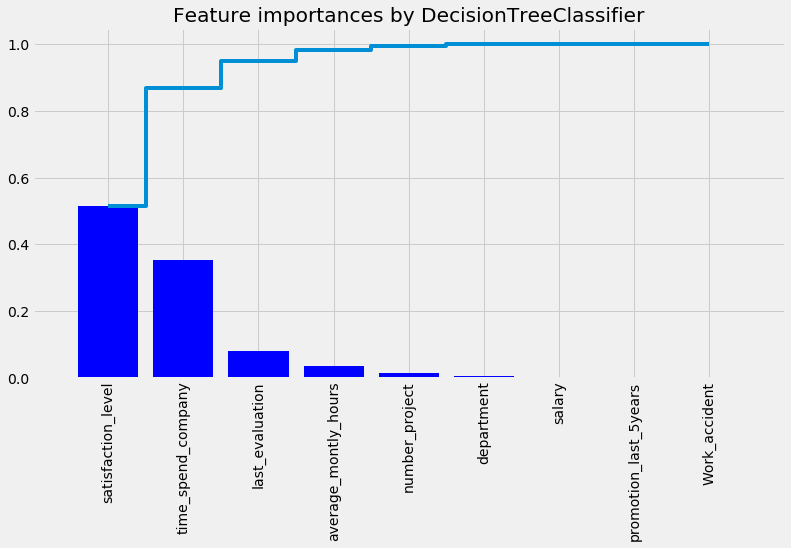

In [54]:
#decision tree classifier to find most useful features

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

#converting into categorical variables
hr["department"] = hr["department"].astype('category').cat.codes
hr["salary"] = hr["salary"].astype('category').cat.codes


# Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(hr.drop('left',axis=1), 
                                                    hr['left'], test_size=0.30, 
                                                    random_state=101)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = hr.drop(['left'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='blue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

### Satisfaction level, time spent in the company and last evaluation are the best features for the prediction.

## Lets divide the data into training and testing data

In [57]:
#train test split
target_name = 'left'
X = hr.drop('left', axis=1)

y=hr[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=123, stratify=y)

## Scaling the features as different features have different units and different scales. So bringing them to one scale is better for our predictions.

In [64]:
#Feature Scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_1 = scaler.transform(X_train)
X_test_1 = scaler.transform(X_test)

## Cross validation function which evaluates the power of each model in training data

In [65]:
# Cross Validation function
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#Defining a Cross validation function
#n_folds = 10
def classification_cv(model):
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(model, X_train_1, y_train, cv=kfold, scoring=scoring)
    return(print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std())))

## Logistic regression

In [66]:
#using logistic regression to predict employee risk of leaving
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(C=0.4,class_weight = "balanced")

In [67]:
#Cross validating the model using holdout method
#Cross validation Holdout method for learning
Logistic_regression_cv=classification_cv(logis)
Logistic_regression_cv

Accuracy: 0.748 (0.014)


## Evaluation of Logistic regression model

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve


logis.fit(X_train_1, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test_1))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test_1)))
print(confusion_matrix(y_test, logis.predict(X_test_1)))
print ("Logistic regression accuracy is %2.2f" % accuracy_score(y_test, logis.predict(X_test_1) ))



 ---Logistic Model---
Logistic AUC = 0.77
             precision    recall  f1-score   support

          0       0.92      0.74      0.82      3429
          1       0.49      0.79      0.60      1071

avg / total       0.82      0.75      0.77      4500

[[2546  883]
 [ 226  845]]
Logistic regression accuracy is 0.75


### This model predicted with 75% accuracy. 

## Random Forest classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=6, 
    min_samples_split=10, 
    class_weight="balanced",
    random_state=100
    )

In [76]:
# cross validation
classification_cv(rf)

Accuracy: 0.974 (0.004)


## Evaluating Random forest model

In [73]:
rf.fit(X_train_1, y_train)
print ("\n\n ---Random Forest  Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test_1))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test_1)))
print(confusion_matrix(y_test, rf.predict(X_test_1)))
print ("Random Forest is %2.2f" % accuracy_score(y_test, rf.predict(X_test_1) ))



 ---Random Forest  Model---
Random Forest AUC = 0.95
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      3429
          1       0.95      0.92      0.94      1071

avg / total       0.97      0.97      0.97      4500

[[3381   48]
 [  82  989]]
Random Forest is 0.97


### This model predicted with 97% accuracy which is pretty good.

## Gradient Boosting classifier

In [77]:
## Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=400,learning_rate=0.1,random_state=100,max_features=4 )

## Evaluating the model

In [79]:
#fitting the model
gbc.fit(X_train_1, y_train)
print ("\n\n ---GBC---")
gbc_roc_auc = roc_auc_score(y_test, gbc.predict(X_test_1))
print ("GBC AUC = %2.2f" % gbc_roc_auc)
print(classification_report(y_test, gbc.predict(X_test_1)))
print(confusion_matrix(y_test, gbc.predict(X_test_1)))
print ("GBC accuracy is %2.2f" % accuracy_score(y_test, gbc.predict(X_test_1) ))



 ---GBC---
GBC AUC = 0.96
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      3429
          1       0.97      0.94      0.95      1071

avg / total       0.98      0.98      0.98      4500

[[3397   32]
 [  69 1002]]
GBC accuracy is 0.98


## Gradient boosting gives us 98% accuracy. Almost accurate predictions on unseen data. Which is pretty good !

## AUC- ROC curve is the best way to evaluate a classification model. Creating ROC curve.

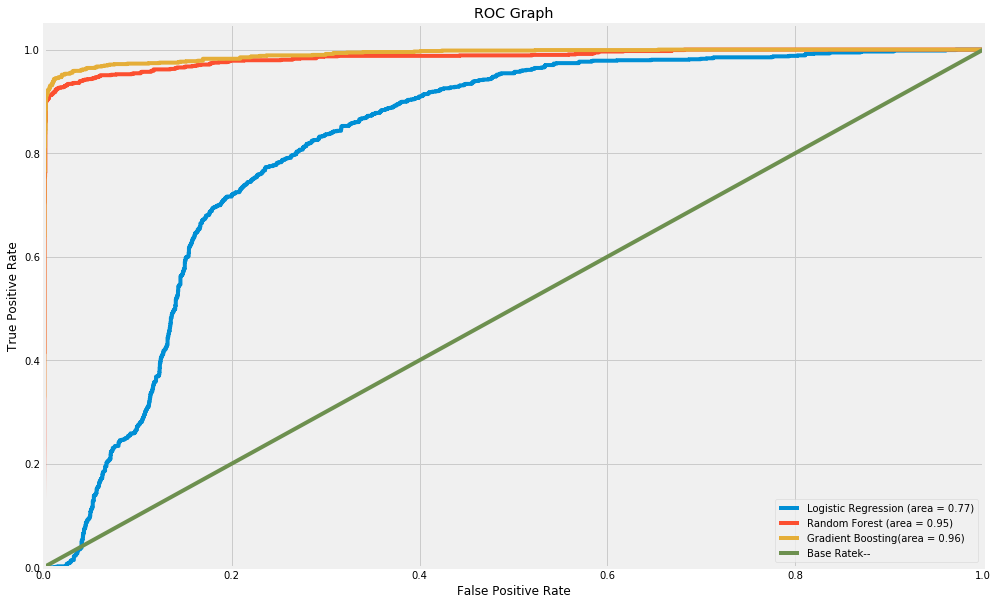

In [80]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test_1)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test_1)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test_1)[:,1])



plt.figure(figsize=(15, 10))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Ensembled GBC ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting(area = %0.2f)' % gbc_roc_auc)


# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

## Based on the analysis and some machine learning we can predict which employees leave the company and then methodologies can be developed to retain employees.